# 基尼系数

![](https://i.postimg.cc/1tZ7z6WH/screenshot-16.png)

$$G = 1 - \sum_{i=1}^kp_i^2$$

- 对于二分类问题
$$G = 1 - x^2 - (1-x)^2$$
$$\Downarrow$$
$$= -2x^2 + 2x$$
- 可以看出，对于二分类问题，当$x = \frac{1}{2}$ 时，基尼系数又最大值
- 即此时，系统不确定性最大

### 1. 基尼系数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion='gini')
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


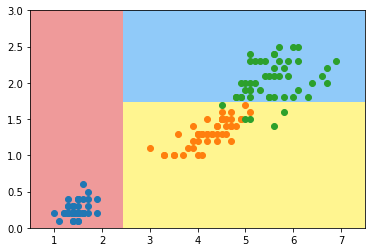

In [9]:
plot_decision_boundary(dt_clf, axis=(0.5, 7.5, 0, 3))
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

### 2. 模拟使用基尼系数划分

In [12]:
from collections import Counter
from math import log

# 基于维度 d 的 value 值进行划分
def split(X, y, d, value):
    index_a = (X[:, d] <= value)
    index_b = (X[:, d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

# 计算每一类样本点的基尼系数的和
def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

# 寻找要划分的 value 值
def try_split(X, y):
    best_g = float('inf') # 最小的基尼系数的值
    best_d, best_v = -1, -1     # 划分的维度，划分的位置
    # 遍历每一个维度
    for d in range(X.shape[1]):
        # 每两个样本点在 d 这个维度中间的值. 首先把 d 维所有样本排序
        sorted_index = np.argsort(X[:, d])
        for i in range(1, len(X)):
            if X[sorted_index[i-1], d] != X[sorted_index[i], d]:
                v = (X[sorted_index[i-1], d] + X[sorted_index[i], d]) / 2
                x_l, x_r, y_l, y_r = split(X, y, d, v)
                # 计算当前划分后的两部分结果基尼系数是多少
                g = gini(y_l) + gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
    return best_g, best_d, best_v

In [13]:
best_g, best_d, best_v = try_split(X, y)
print("best_g = ", best_g)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_g =  0.5
best_d =  0
best_v =  2.45


**可以看出，在第 0 个维度（x轴）的 2.45 处划分，有最小的基尼系数 0.5** 

In [14]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [15]:
# 从上图可以看出，经过一次划分，粉红色部分只有一类，故基尼系数为 0
gini(y1_l)

0.0

In [16]:
gini(y1_r)

0.5

In [17]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_g = ", best_g2)
print("best_d", best_d2)
print("best_v", best_v2)

best_g =  0.2105714900645938
best_d 1
best_v 1.75


**可以看出，在第 1 个维度（y轴）的 1.75 处划分，有最小的基尼系数 0.21** 

- scikit-learn 中默认为基尼系数